In [1]:
import sys
import pandas as pd
from agents.agent import *
from task import *

num_episodes = 1000
target_pos = np.array([0.0, 0.0, 10.0])
task = Task(target_pos = target_pos)
drone_agent = DDPG(task)

#setup
labels = ['time', 'x', 'y', 'z', 
          'phi', 'theta', 'psi', 
          'x_vel', 'y_vel', 'z_vel', 
          'phi_vel', 'theta_vel', 'psi_vel', 
          'rotor1_speed', 'rotor2_speed', 'rotor3_speed']
plot = {x: [] for x in ['episode', 'score']}

all_results = []

for i_episode in range(1, num_episodes + 1):
    '''reset state'''
    state = drone_agent.reset_episode()
    
    #keep running all along episodes
    while True:
        '''taking action, action is rotor speed'''
        action = drone_agent.act(state)
        '''observe R', S' '''
        next_state, reward, done = task.step(action)
        '''learn and save experience'''
        drone_agent.step(action = action, reward = reward, next_state = next_state, done = done)
        state = next_state    
        
        if done:
            print("\repisode: {:4d}, score: {:7.3f}, best: {:7.3f}".format(i_episode, drone_agent.score, drone_agent.best_score), end = "")
            
            #plot
            plot['episode'].append(i_episode)
            plot['score'].append(drone_agent.score)
            
            break
        
    
    sys.stdout.flush()

Using TensorFlow backend.


episode: 1000, score:  32.988, best:  32.997

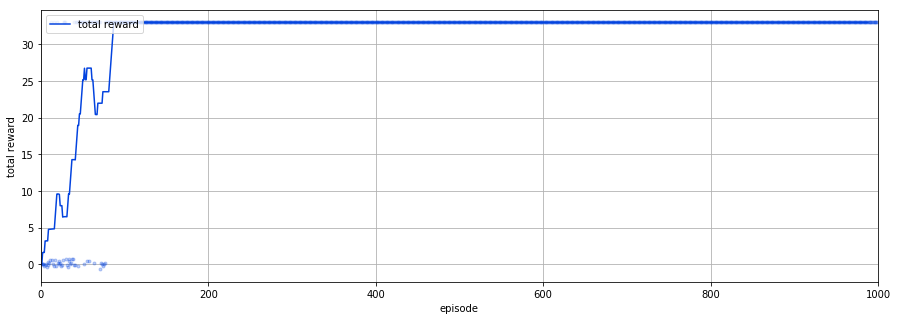

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

smooth = 21
plt.figure(figsize = (15, 5))
plt.plot(plot['score'], '.', alpha = 0.25, color = 'xkcd:blue')
plt.plot(np.convolve(plot['score'], np.ones(smooth) / smooth)[(smooth - 1) // 2 : -smooth], 
         color = 'xkcd:blue', 
         label = 'total reward')

plt.ylabel('total reward')
plt.legend(loc = 2)
plt.grid(True)

plt.xlabel('episode')
plt.xlim(0, len(plot['score']))

plt.show()

In [3]:
print(np.mean(plot['score'][990 : -1]))

32.987765551882234
